In [65]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
import pandas as pd
import math
import os
data_df = pd.read_excel(os.getcwd()+"\Data\house_price_modelling_data.xlsx", index_col=0)

In [66]:
data_df.shape

(545, 26)

In [67]:
data_df.head()

,price,area,log_area,log_price,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_2,...,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,8.911934,16.403275,False,False,True,False,False,True,...,False,False,False,True,False,True,False,True,False,False
1,12250000,8960,9.100526,16.321036,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,12250000,9960,9.206332,16.321036,False,True,False,False,False,True,...,False,True,False,False,False,True,False,True,True,False
3,12215000,7500,8.922658,16.318175,False,False,True,False,False,True,...,False,True,False,True,False,False,True,True,False,False
4,11410000,7420,8.911934,16.250001,False,False,True,False,False,False,...,True,True,False,True,False,True,False,False,False,False


In [68]:
y = data_df[['log_price']]
X = data_df.drop(columns=['price', 'log_area', 'log_price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Lasso Regression

In [69]:
Lasso_model = Lasso(alpha=0.001)
Lasso_model.fit(X_train, y_train)
predictions = Lasso_model.predict(X_test)

In [70]:
print(Lasso_model.score(X_test, y_test))
print(Lasso_model.coef_)
print(Lasso_model.intercept_)

0.673092845090433
[ 4.89154304e-05 -6.02263557e-02  5.50805936e-04 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  1.84907953e-01  2.70311969e-01
  2.24538805e-01  7.18167032e-02  1.65605444e-01  3.04680450e-01
  1.40503563e-01  5.28843240e-02  1.26319671e-01  1.20075444e-01
  1.15610111e-01  7.76847111e-02  9.57616112e-02  0.00000000e+00
  9.01218324e-02  1.19465664e-03 -1.12175224e-01]
[14.71642131]


In [71]:
X_train.columns

Index(['area', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bathrooms_2', 'bathrooms_3', 'bathrooms_4', 'stories_2',
       'stories_3', 'stories_4', 'mainroad_yes', 'guestroom_yes',
       'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes',
       'parking_1', 'parking_2', 'parking_3', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [72]:
dict(map(lambda i,j : (i,j) , X_train.columns,Lasso_model.coef_))

{'area': 4.8915430436869966e-05,
 'bedrooms_2': -0.06022635571588515,
 'bedrooms_3': 0.0005508059361281347,
 'bedrooms_4': -0.0,
 'bedrooms_5': -0.0,
 'bedrooms_6': 0.0,
 'bathrooms_2': 0.1849079525827333,
 'bathrooms_3': 0.27031196857665846,
 'bathrooms_4': 0.22453880494840392,
 'stories_2': 0.07181670324984919,
 'stories_3': 0.1656054440703496,
 'stories_4': 0.3046804497750077,
 'mainroad_yes': 0.1405035628771688,
 'guestroom_yes': 0.052884323951833415,
 'basement_yes': 0.12631967134239608,
 'hotwaterheating_yes': 0.1200754443820378,
 'airconditioning_yes': 0.11561011075373212,
 'parking_1': 0.07768471111652633,
 'parking_2': 0.09576161117497418,
 'parking_3': 0.0,
 'prefarea_yes': 0.09012183237131789,
 'furnishingstatus_semi-furnished': 0.0011946566385591677,
 'furnishingstatus_unfurnished': -0.1121752244672192}

In [73]:
predictions = [math.exp(i) for i in predictions]
actuals = [math.exp(i) for i in y_test['log_price']]

In [74]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score
mape = mean_absolute_percentage_error(actuals, predictions) 
rsq_ = r2_score(actuals, predictions, multioutput='raw_values') 
print("MAPE:",mape)
print("RSQ:",rsq_)

MAPE: 0.18169745131284282
RSQ: [0.68502881]


In [75]:
from sklearn.model_selection import GridSearchCV
params = {'alpha':[0.001, 0.002, 0.003, 0.004, 0.005, 0.0009, 0.0008, 0.0007, 0.0006]}
lasso = Lasso()
lasso_regg = GridSearchCV(lasso, params, scoring='r2')
lasso_regg.fit(X, y)
print(lasso_regg.best_params_)
print(lasso_regg.best_score_)
predictions = lasso_regg.predict(X)

{'alpha': 0.002}
-7.139200234489334


In [76]:
predictions = [math.exp(i) for i in predictions]
actuals = [math.exp(i) for i in y['log_price']]

In [77]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score
mape = mean_absolute_percentage_error(actuals, predictions) 
rsq_ = r2_score(actuals, predictions, multioutput='raw_values') 
print("MAPE:",mape)
print("RSQ:",rsq_)

MAPE: 0.16129853168865899
RSQ: [0.66159876]


# Ridge Regression

In [78]:
ridge_model = Ridge(alpha=0.001)
ridge_model.fit(X_train, y_train)
predictions = ridge_model.predict(X_test)

In [79]:
print(ridge_model.score(X_test, y_test))
print(ridge_model.coef_)
print(ridge_model.intercept_)

0.6717286284474142
[[ 4.71216975e-05  3.86621974e-02  9.66006097e-02  8.19520333e-02
   7.52383467e-02  2.47160006e-01  1.90246196e-01  3.49816498e-01
   6.53941531e-01  7.74582029e-02  1.84767084e-01  3.13979032e-01
   1.40959611e-01  5.92224347e-02  1.30243604e-01  1.41226020e-01
   1.17804536e-01  8.50310456e-02  1.05773666e-01 -2.00092194e-02
   9.77916097e-02  9.05819905e-03 -1.08748614e-01]]
[14.60954462]


In [80]:
dict(map(lambda i,j : (i,j) , X_train.columns,ridge_model.coef_[0]))

{'area': 4.7121697479347524e-05,
 'bedrooms_2': 0.038662197394389114,
 'bedrooms_3': 0.09660060970885312,
 'bedrooms_4': 0.08195203325840278,
 'bedrooms_5': 0.07523834665915784,
 'bedrooms_6': 0.24716000619114162,
 'bathrooms_2': 0.19024619580293248,
 'bathrooms_3': 0.3498164977875639,
 'bathrooms_4': 0.6539415306217282,
 'stories_2': 0.07745820291037234,
 'stories_3': 0.18476708400565875,
 'stories_4': 0.3139790319673988,
 'mainroad_yes': 0.14095961101855556,
 'guestroom_yes': 0.05922243473085731,
 'basement_yes': 0.13024360368856286,
 'hotwaterheating_yes': 0.14122602004625992,
 'airconditioning_yes': 0.11780453572984366,
 'parking_1': 0.08503104557941907,
 'parking_2': 0.10577366621365505,
 'parking_3': -0.020009219385167712,
 'prefarea_yes': 0.09779160972037981,
 'furnishingstatus_semi-furnished': 0.009058199053076308,
 'furnishingstatus_unfurnished': -0.10874861355040655}

In [81]:
predictions = [math.exp(i) for i in predictions]
actuals = [math.exp(i) for i in y_test['log_price']]

In [82]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score
mape = mean_absolute_percentage_error(actuals, predictions) 
rsq_ = r2_score(actuals, predictions, multioutput='raw_values') 
print("MAPE:",mape)
print("RSQ:",rsq_)

MAPE: 0.18206460920435308
RSQ: [0.69063911]


# ElasticNet Regression

In [83]:
elasticNet_model = ElasticNet(alpha=0.001)
elasticNet_model.fit(X_train, y_train)
predictions = elasticNet_model.predict(X_test)

In [84]:
print(elasticNet_model.score(X_test, y_test))
print(elasticNet_model.coef_)
print(elasticNet_model.intercept_)

0.6731290797746854
[ 4.82161080e-05 -5.20887861e-02  7.10332602e-03  0.00000000e+00
 -0.00000000e+00  5.51239975e-02  1.86687519e-01  2.98290703e-01
  3.59042577e-01  7.52505801e-02  1.74368853e-01  3.09670477e-01
  1.41126598e-01  5.58587540e-02  1.28034229e-01  1.29093267e-01
  1.16964463e-01  8.15736134e-02  1.00563760e-01  0.00000000e+00
  9.32734909e-02  4.99555554e-03 -1.10526665e-01]
[14.70331844]


In [85]:
dict(map(lambda i,j : (i,j) , X_train.columns,elasticNet_model.coef_))

{'area': 4.821610799375931e-05,
 'bedrooms_2': -0.05208878609733947,
 'bedrooms_3': 0.00710332602330247,
 'bedrooms_4': 0.0,
 'bedrooms_5': -0.0,
 'bedrooms_6': 0.055123997541178006,
 'bathrooms_2': 0.18668751914628617,
 'bathrooms_3': 0.2982907033914447,
 'bathrooms_4': 0.3590425770467916,
 'stories_2': 0.07525058007743117,
 'stories_3': 0.1743688528840901,
 'stories_4': 0.30967047667000397,
 'mainroad_yes': 0.14112659837330682,
 'guestroom_yes': 0.05585875399675205,
 'basement_yes': 0.12803422925056485,
 'hotwaterheating_yes': 0.12909326730412024,
 'airconditioning_yes': 0.11696446270563897,
 'parking_1': 0.08157361343103789,
 'parking_2': 0.100563760315542,
 'parking_3': 0.0,
 'prefarea_yes': 0.09327349087695862,
 'furnishingstatus_semi-furnished': 0.004995555542005789,
 'furnishingstatus_unfurnished': -0.11052666532672635}

In [86]:
predictions = [math.exp(i) for i in predictions]
actuals = [math.exp(i) for i in y_test['log_price']]

In [87]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score
mape = mean_absolute_percentage_error(actuals, predictions) 


print("MAPE:",mape)
print("RSQ:",rsq_)

MAPE: 0.18183099080219264
RSQ: [0.68820883]


In [88]:
df = pd.DataFrame({'actuals':actuals, 'predictions':predictions})

In [95]:
df = df.sort_values(by='predictions')

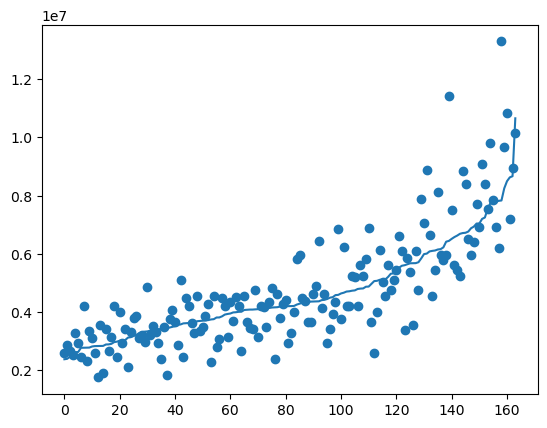

In [97]:
import matplotlib.pyplot as plt
plt.scatter([i for i in range(0, len(actuals))], df['actuals'])
plt.plot([i for i in range(0, len(predictions))], df['predictions'])
plt.show()

In [91]:
# predictions = elasticNet_model.predict(X)
# predictions = [math.exp(i) for i in predictions]

In [92]:
# df = pd.DataFrame({'Id':[i for i in range(1, len(predictions)+1)],'SalePrice':predictions})
# df.to_csv(r"C:\Users\ravip\OneDrive\Documents\New folder\Data Science\Machine Learning\Linear Regression\house_price_modelling_data_output.csv")